<a href="https://colab.research.google.com/github/koheinish/biocircuits/blob/master/%E3%82%BD%E3%83%95%E3%83%88%E3%82%A6%E3%82%A7%E3%82%A2%E8%AC%9B%E7%BF%926_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ソフトウェア講習6：Pythonを用いた反応動態シミュレーション
### Tutorial (1) : google colaboratoryのファイルを開いたときの注意点
　google colaboratoryのファイルを開いた際には必ず、ご自身のgoogle driveに保存せよ。

　(課題などが保存されない可能性がある。)

　以下の画像を参考にして、ご自身のgoogle driveに保存せよ。

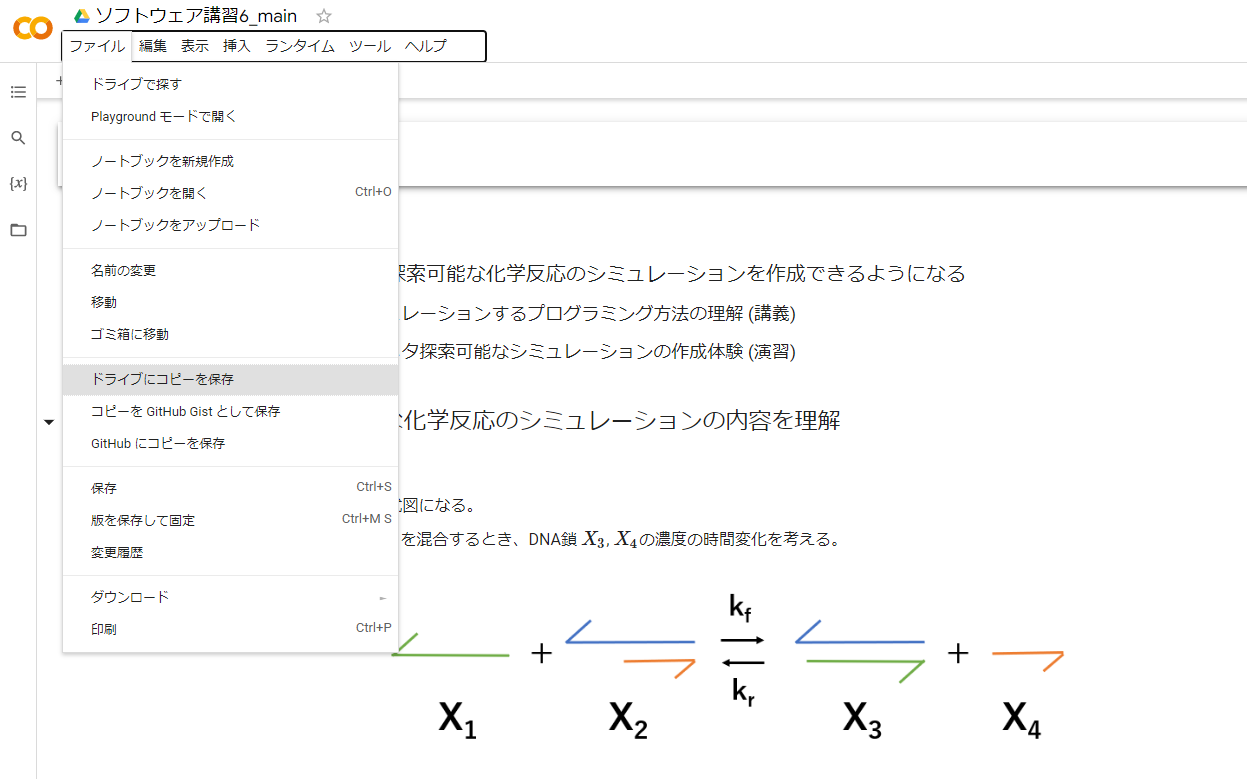

### Tutorial (2)：google colaboratory上でのプログラムの実行方法とコメント
1. プログラムの実行方法

　google colaboratory上でプログラムを実行する(動かす)際は、プログラムが書かれているセル(カタマリ)の左上にある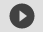
ボタンをクリックすることで実行することができる。試しに、次のセルにあるコードを実行してみましょう。(Hello World!と出力されれば、実行されたことになる。)

2. コメント

　Pythonで書かれたプログラムでは"#"を書くことで"#"以下の内容はプログラムとして実行されず、コメントとして残すことができる。






In [ ]:
print("Hello World!")
#print("natsuno gakkou !")

Hello World!


## 1.本講習のゴール

## 1.1 本講習のゴール
### サンプルコードを用いて、パラメタ探索可能な化学反応のシミュレーションを作成できるようになる。
#### GOAL1. 化学反応のダイナミクスをシミュレーションするプログラミング方法の理解 (講義)

#### GOAL2. サンプルコードを用いて、パラメタ探索可能なシミュレーションの作成体験 (演習)



## 1.2 GOAL１: 化学反応のダイナミクスをシミュレーションするプログラミング方法の理解
### 1.2.1 DNA鎖置換反応の簡易モデル
以下の反応図は、DNA鎖置換反応を表した模式図になる。

具体的には、試験管内で左辺のDNA鎖 $X_1$, $X_2$を混合するとき、DNA鎖 $X_3$, $X_4$の濃度の時間変化を考える。

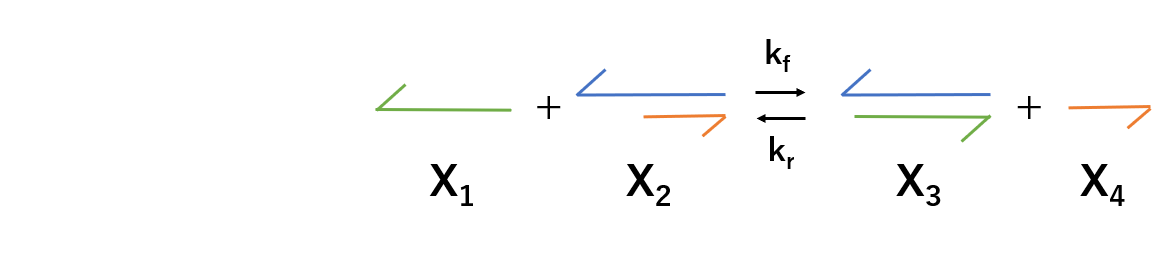



### 1.2.2 微分方程式
\begin{align}
&\frac{d x_1}{dt} = -k_f x_1 x_2 + k_r x_3 x_4\\
&\frac{d x_2}{dt} = -k_f x_1 x_2 + k_r x_3 x_4\\
&\frac{d x_3}{dt} = k_f x_1 x_2 - k_r x_3 x_4\\
&\frac{d x_4}{dt} = k_f x_1 x_2 - k_r x_3 x_4\\
&\end{align}


**各DNAの濃度の時間変化をシミュレーションする。**

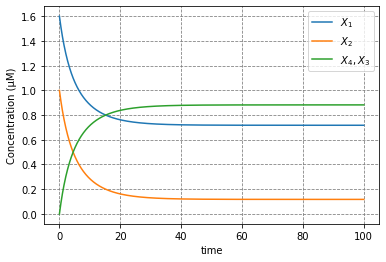

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#@title Parameters { run: "auto", vertical-output: true, form-width: "50%", display-mode: "both" }
k_f = 0.12 #@param {type:"slider", min:0, max:0.2, step:0.01} 
k_r = 0.013 #@param {type:"slider", min:0, max:0.03, step:0.001} 
x_1 = 1.6 #@param {type:"slider", min:0, max:2.0, step:0.05} 
# µM



def odemodel(y, t, kf, kr):
    dydt = [-kf * y[0] * y[1] + kr * y[2] * y[3],
            -kf * y[0] * y[1] + kr * y[2] * y[3],
            kf * y[0] * y[1] - kr * y[2] * y[3],
            kf * y[0] * y[1] - kr * y[2] * y[3]]
            
    return dydt


x_2 = 1.0 # µM
x_3 = 0 # µM
x_4 = 0 # µM

y0 = [x_1, x_2, x_3, x_4]

t = np.linspace(0,100,1000)
model = lambda y,t: odemodel(y, t, k_f, k_r)


y = odeint(model,y0,t).T



plt.plot(t,y[0], label = "$X_1$")
plt.plot(t,y[1], label = "$X_2$")
plt.plot(t,y[2], label = "$X_4, X_3$")
plt.xlabel('time')
plt.ylabel('Concentration (µM)')
plt.grid(True, linestyle='--', color='grey')
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.show()




## 1.3 本日のアジェンダ
###1. 本講習のゴール
###2. 反応速度論と微分方程式の復習
###3. Pythonプログラミングの基礎
###4. DNA回路のシミュレーション
###5. 発展的な内容:反応拡散方程式による時空間パターンの形成シミュレーション
###6. 演習課題の説明
###7. 演習




## 2. 反応速度論と微分方程式の復習
本章では、化学反応から微分方程式モデルを導出する。

本章の内容は、講座2の"DNAコンピューティングと反応速度論"の内容の復習となる。

### 2.1 反応速度論の考え方と質量作用の法則
#### 2.1.1 反応速度論の考え方
- 分子の濃度$x_i(t)$を変数として時間変化を知りたい
- $x_i(t)$の変化 (反応速度) を知ることができれば経時変化を追いかけることができる
<br>
<br>

#### 2.1.2 質量作用の法則
- 反応速度は反応物の濃度の積に比例する
<br>
<br>

- 反応速度の例 ($k$は反応速度定数)

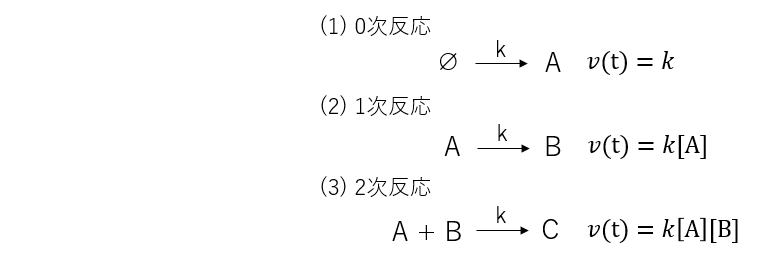


### 2.2 反応速度と微分方程式モデル
- 反応の例 (1次反応)

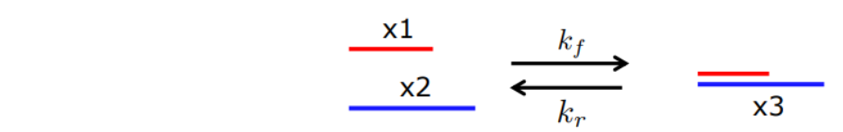


- 正反応と逆反応の反応速度と各反応を考慮した際の反応物の時間変化
<br>
<br>
\begin{align}
&v_f(t) = k_f x_1(t) x_2(t)\\
&v_r(t) = k_r x_3(t)\\
&\frac{d x_3}{dt} = v_f(t) - v_r(t) = k_f x_1(t) x_2(t) - k_r x_3(t) \\
&\end{align}



### 2.3 反応速度論より作成した微分方程式モデルの例 (鎖置換反応)
#### 2.3.1 鎖置換反応の反応概略図 (再掲)
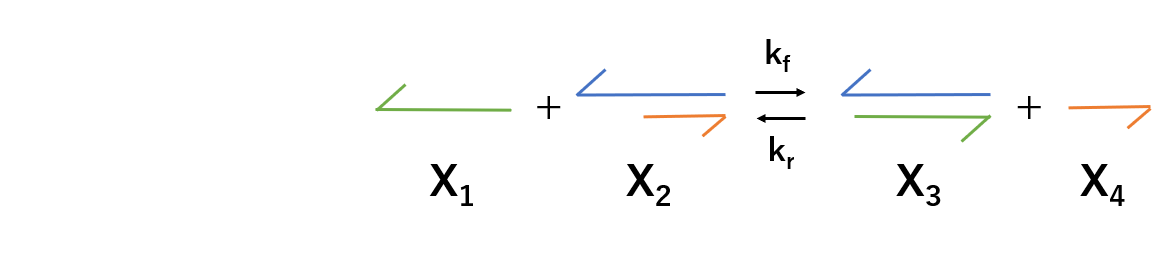


#### 2.3.2 鎖置換反応の微分方程式モデル (再掲)



\begin{align}
&\frac{d x_1}{dt} = -k_f x_1 x_2 + k_r x_3 x_4\\
&\frac{d x_2}{dt} = -k_f x_1 x_2 + k_r x_3 x_4\\
&\frac{d x_3}{dt} = k_f x_1 x_2 - k_r x_3 x_4\\
&\frac{d x_4}{dt} = k_f x_1 x_2 - k_r x_3 x_4\\
&\end{align}

微分方程式モデルをもとに、各DNA鎖の濃度の時間変化をシミュレーションしたい！


##3. Pythonプログラミングの基礎
本章では、Pythonの基礎的なプログラミング方法と微分方程式の解き方および視覚的にパラメタを変化させる方法を学ぶ。

具体的には、まず一次反応を例にして、微分方程式の解き方を紹介する。

その後、そのプログラムを用いて視覚的にパラメタを変化させる方法を紹介する。

Pythonの基本的なプログラミング方法をより詳しく知りたい方は以下のノートブックを参照されたい。

https://colab.research.google.com/drive/1LsdYb8UcrMJfr6J91DI3EXsG0Bb0F2Ow?usp=sharing




### 3.1 Pythonを用いた微分方程式の解法
本節では、ScipyというPythonのライブラリを用いて、微分方程式を解く方法を紹介する。

グラフの描画方法などは、上記のリンクを参照されたい。

ここでは、化学的な微分方程式の代表例として、1次反応によるDNA濃度の時間変化を考える。



- 化学反応式

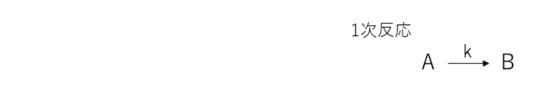

<br>
<br>

- 微分方程式モデル

\begin{align}
&\frac{d A(t)}{dt} = -kA(t)\\
&\frac{d B(t)}{dt} = kA(t)\\
&\end{align}

<br>
ここで、$k$は反応速度定数である。


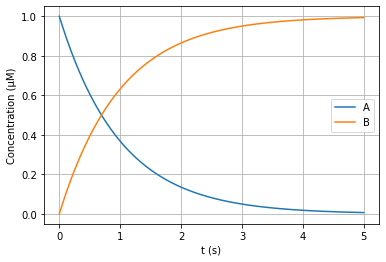

In [ ]:
#ライブラリーをインポート
import numpy as np 
import matplotlib.pyplot as plt

# 微分方程式を解くためのツールのインポート
from scipy.integrate import odeint

# 初期濃度
A_0 = 1 #µM
B_0 = 0 #µM
y_0 = [A_0, B_0]


# 反応速度定数
k = 1 


# 時間を定義
t = np.linspace(0, 5.0, 1000)

# 解きたい微分方程式の定義
#y = [A(t), B(t)]
def odemodel(y, t, k_l):
  dydt = [- k_l * y[0],
           k_l * y[0]]
  return dydt

model = lambda y,t: odemodel(y, t, k)

# 微分方程式を解かせる
y = odeint(model, y_0, t).T

# グラフの可視化
plt.plot(t,y[0], label = "A")
plt.plot(t,y[1], label = "B")
plt.xlabel('t (s)')
plt.ylabel('Concentration (µM)')
plt.grid(':')
plt.legend()
plt.show()

## 3.2 視覚的にパラメタを変化させる方法
本節では、Gooogle Colablatory上でスライドバーを使って視覚的にパラメタを変化させる方法を紹介する。

この方法を学ぶことで、コードをいじることなく、パラメタを変化させたグラフを表示することができるようになる。




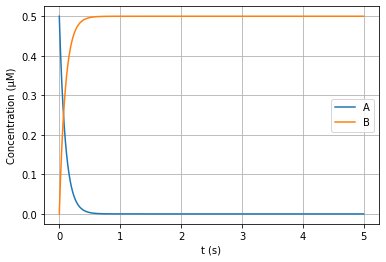

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# スライドバーの設置
#@title Parameters { run: "auto", vertical-output: true, form-width: "50%", display-mode: "both" }
# 反応速度定数をスライドバーで変化

k = 10 #@param {type:"slider", min:0, max:10.0, step:2}
A_0 = 0.5 #@param {type:"slider", min:0, max:2, step:0.5}


# 初期濃度(µM)をスライドバーで変化


B_0 = 0 

y_0 = [A_0, B_0]





# 微分方程式を解くためのツールのインポート
from scipy.integrate import odeint

# 時間を定義
t = np.linspace(0, 5.0, 1000)

# 解きたい微分方程式の定義
def odemodel(y, t, k_l):
  dydt = [- k_l * y[0],
           k_l * y[0]]
  return dydt

model = lambda y,t: odemodel(y, t, k)


# 微分方程式を解かせる
y = odeint(model,y_0, t).T


# グラフの可視化
plt.plot(t,y[0], label = "A")
plt.plot(t,y[1], label = "B")
plt.xlabel('t (s)')
plt.ylabel('Concentration (µM)')
plt.grid(':')
plt.legend()
plt.show()

## 4. DNA回路のシミュレーション
本章では、前章で学んだPythonプログラミングの基礎をもとに実際のシミュレーションの作成方法を学ぶ。

具体的には、まず、DNAの鎖置換反応のシミュレーション方法について学ぶ。

その後、より複雑なDNA反応のシミュレーション方法について紹介する。

### 4.1 鎖置換反応のシミュレーション
本節では、前章で学習したPythonプログラミングの基礎をもとに、初めに紹介したDNAの鎖置換反応をシミュレーション方法を紹介する。

#### 4.1.1 鎖置換反応の反応概略図 (再掲)

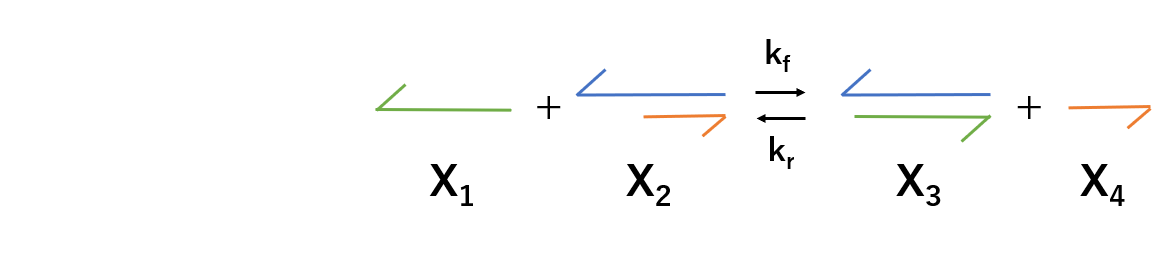


#### 4.1.2 鎖置換反応の微分方程式モデル (再掲)
\begin{align}
&\frac{d x_1}{dt} = -k_f x_1 x_2 + k_r x_3 x_4\\
&\frac{d x_2}{dt} = -k_f x_1 x_2 + k_r x_3 x_4\\
&\frac{d x_3}{dt} = k_f x_1 x_2 - k_r x_3 x_4\\
&\frac{d x_4}{dt} = k_f x_1 x_2 - k_r x_3 x_4\\
&\end{align}

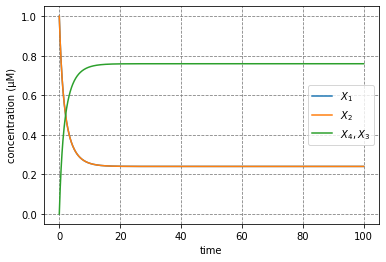

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#@title Parameters { run: "auto", vertical-output: true, form-width: "50%", display-mode: "both" }

#################################
##### これより下の変数を変更  ###
#################################

# X1の初期濃度
x_1 = 0.75 #@param {type:"slider", min:0, max:2.0, step:0.05}

# µM

#反応パラメータ
k_f = 0.05
k_r = 0.05

#################################
##### これより上の変数を変更  ###
#################################

# その他のDNA鎖の初期濃度
x_2 = 1.0 # µM
x_3 = 0 # µM
x_4 = 0 # µM


y_0 = [x_1, x_2, x_3, x_4]


# 時間を定義
t = np.linspace(0,100,1000) #(start, end, points)

# 微分方程式を定義
def odemodel(y, t, kf, kr):
    dydt = [-kf * y[0] * y[1] + kr * y[2] * y[3],
            -kf * y[0] * y[1] + kr * y[2] * y[3],
            kf * y[0] * y[1] - kr * y[2] * y[3],
            kf * y[0] * y[1] - kr * y[2] * y[3]]
            
    return dydt

model = lambda y,t: odemodel(y, t, k_f, k_r)


# 微分方程式を解かせる
y = odeint(model,y_0,t).T


# グラフの描画
plt.plot(t,y[0], label = "$X_1$")
plt.plot(t,y[1], label = "$X_2$")
plt.plot(t,y[2], label = "$X_4, X_3$")
plt.xlabel('time')
plt.ylabel('concentration (µM)')
plt.grid(True, linestyle='--', color='grey')
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.show()


### 4.2 サンプルコードを用いた個人実習 (提出不要)
本節では前節で紹介した鎖置換反応のサンプルコードにスライドバーを移動させたり、追加することでシミュレーション結果がどのように変化するかを体験する。


1. 上記のサンプルコードにおいてスライドバーを動かす(初期濃度を変化させる)ことで、シミュレーション結果がどのように変化するか、確認せよ。



2. 上記のサンプルコードにおいて、初期濃度を変化させるだけではなく、速度係数の$k_f$, $k_r$についてもスライドバーを追加して、シミュレーション結果がのように変化するか、確認せよ。(但し、スライドバーの設定は"min:0, Max:0.5, ステップ:0.05"とせよ。 )

### 4.3 Lotka-Volterraモデルを模したDNA反応系

本節では、振動するDNA反応系としてLotka-Volterraモデルを模したDNA反応系について紹介する。

具体的は、まず初めに、一般的なLotka-Volterraモデルについて説明し、シミュレーション方法の理解を目指す。

その後、Lotka-Volterraモデルを模したDNA反応系の構造について説明する。

#### 4.3.1  Lotka-Volterraモデルの概要
(1) Lotka-Volterraモデルのイメージ

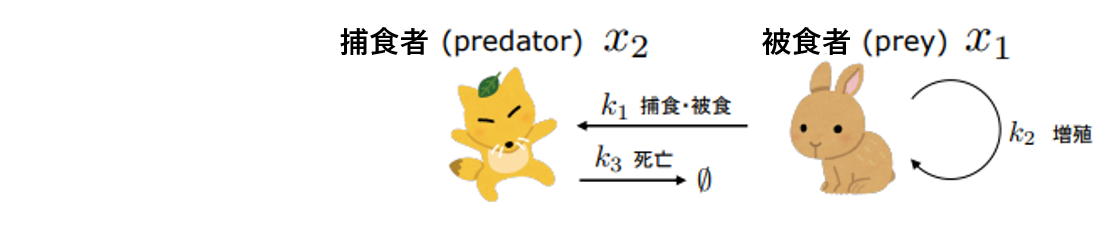

(2) 反応式

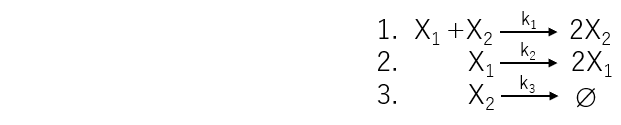

(3) 微分方程式

\begin{align}
&\frac{d x_1}{dt} = k_2 x_1 - k_1 x_1 x_2 \\
&\frac{d x_2}{dt} = k_1 x_1 x_2 - k_3 x_2 \\
&\end{align}


被食者$x_1$と捕食者$x_2$の個体数の時間変化をシミュレーションしたい！



出典①：Lotka, Elements of Physical Biology, 1925.

出典②：Volterra, Animal Ecology, 1926.


####4.3.2 Lotka-Volterraモデルのサンプルコード
本小節では、4.3.1 で紹介したLotka-Volterraモデルの微分方程式を解くシミュレーション方法を紹介する。

下記のコードにて初期個体数や反応速度定数を変えたときにシミュレーション結果がどのように変化するか確認せよ。


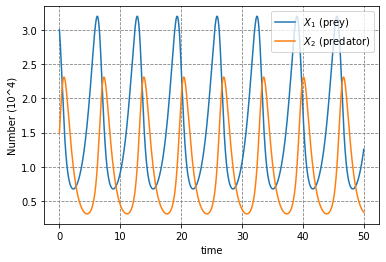

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


#################################
##### これより下の変数を変更  ###
#################################
#@title Parameters { run: "auto", vertical-output: true, form-width: "50%", display-mode: "both" }

k1 = 0.8 #@param {type:"slider", min:0, max:2, step:0.1}
k2 = 0.8 #@param {type:"slider", min:0, max:2, step:0.1}
k3 = 1.3 #@param {type:"slider", min:0, max:2, step:0.1}

X1 = 3   #10^4匹
X2 = 1.5 #10^4匹

#################################
##### これより上の変数を変更  ###
#################################

y0 = [X1, X2]

# 時間を定義
t = np.linspace(0,50,10000) #(start, end, points)


# 微分方程式を定義するコード
def odemodel(y, t, k_1, k_2, k_3):
    dydt = [ - k_1 * y[0] * y[1] + k_2 * y[0],  k_1 * y[0] * y[1] - k_3 * y[1]]
    return dydt
    
model = lambda y,t: odemodel(y, t, k1, k2, k3)


# 微分方程式を解かせる
y = odeint(model,y0,t).T


# グラフの描画
plt.plot(t,y[0], label = "$X_1$ (prey)")
plt.plot(t,y[1], label = "$X_2$ (predator)")
plt.xlabel('time')
plt.ylabel('Number (10^4)')
plt.grid(True, linestyle='--', color='grey')
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

### 4.3.3 Lotka-Volterraモデルを模したDNA反応系の構造
本小節では、前小節で紹介した Lotka-VolterraモデルをDNA反応系を用いて模した際のDNAの反応順序を紹介する。

反応の詳細に関しては、出典を参照されたい。

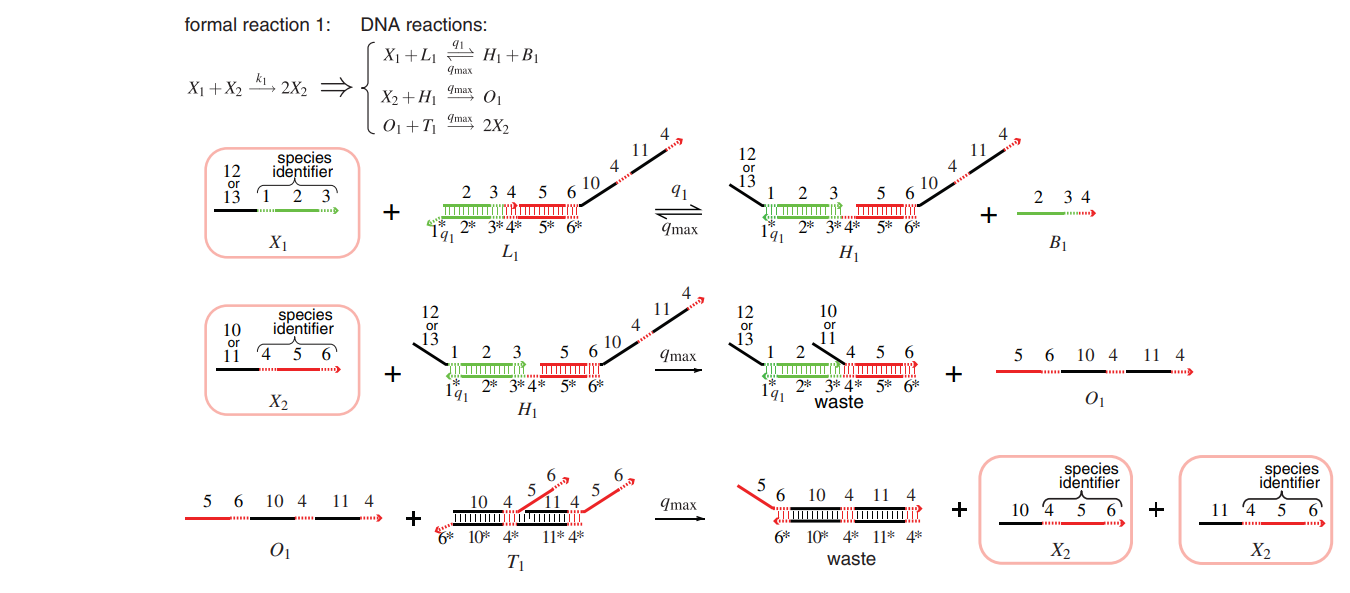

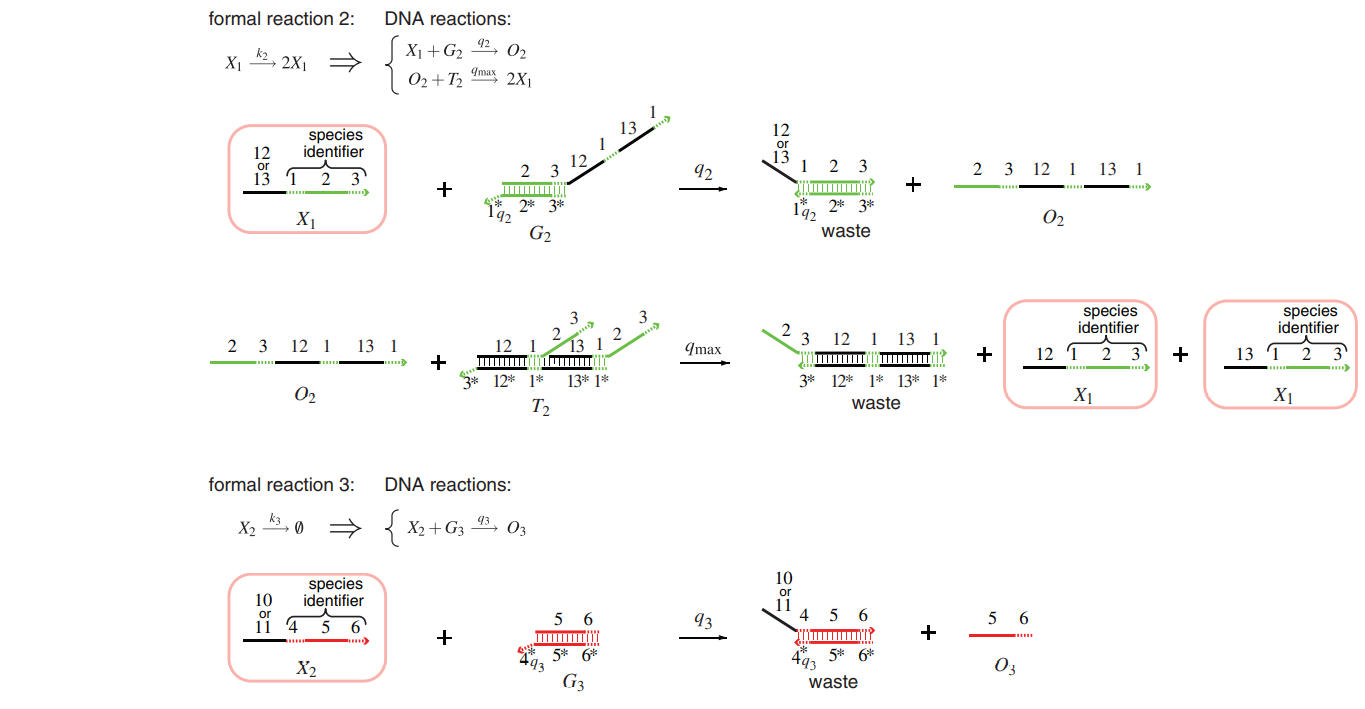

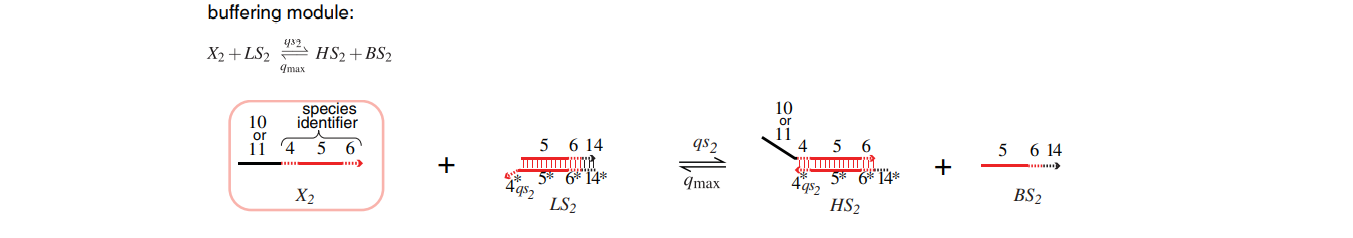







出典：Soloveichik, Seeing, Winfree, DNA as a universal substrate for chemical kinetics, PNAS, 2010, https://www.pnas.org/doi/10.1073/pnas.0909380107.


#### 4.3.4 Lotka-Volterraモデルを模したDNA反応系のサンプルコード
本小節では、Lotka-Volterraモデルを模したDNA反応系のサンプルコードについて紹介する。

シミュレーション内容は、前小節の反応式を記述しただけであるが、反応が複雑になるため、細かい説明は省略する。

速度定数に関するパラメータを動かすことで、振動の波形がどのように変化するか確認せよ。

また、このように数多くの反応系が組み合わさったDNA回路であっても順を追って微分方程式を記述すれば、シミュレーションができることを体験してもらいたい。

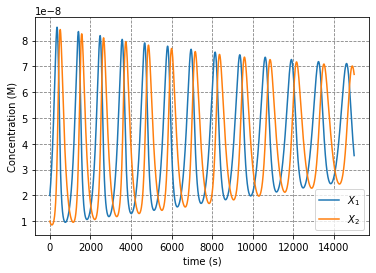

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#@title Parameters { run: "auto", vertical-output: true, form-width: "50%", display-mode: "both" }


## 初期濃度を定義
X1 =20 * (10 ** -9) * (10 ** 9) # 20 nM
X2 =10 * (10 ** -9) * (10 ** 9) # 10 nM
Cmax =10 * (10 ** -6) * (10 ** 9) # 10 µM
L1 = T1 = B1 = G2 = T2 = G3 =  Cmax
H1 = O1 = O2 = HS = 0

y0 = [X1, L1, H1, B1, O1, T1, X2, G2, O2, T2, G3, HS]


## 速度定数を構成するパラメータ
k1 = 1 #@param {type:"slider", min:0, max:5, step:1}
k2 = 1 / 300
k3 = 1 / 300
gamma = 2

## 速度定数を設定
qmax = 10 ** 5 
q1= gamma * k1 * (10 ** 5) * (10 ** -9)
q2 = gamma * k2 * (Cmax ** -1)
q3 = gamma * k3 * (Cmax ** -1)
qs = gamma * k1

k_f1 = q1
k_f2 = qmax
k_f3 = qmax
k_f4 = q2
k_f5 = qmax
k_f6 = q3
k_f7 = qs * Cmax

k_r1 = qmax
k_r2 = qmax * Cmax


# 時間を定義
t = np.linspace(0,15000,10000) #(start, end, points)




# 微分方程式を定義
def odemodel_Lotka_Volterra(y, t, kf1, kf2, kf3, kf4, kf5, kf6, kf7, kr1, kr2):
    dydt = [ 
            #X1
             - kf1 * y[0] * y[1] + kr1 * y[2] * y[3] - kf4 * y[0] * y[7] + 2 * kf5 * y[8] * y[9],

            #L1
            - kf1 * y[0] * y[1] + kr1 * y[2] * y[3],

            #H1
            kf1 * y[0] * y[1] - kr1 * y[2] * y[3] - kf2 * y[2] * y[6],

            #B1 
            kf1 * y[0] * y[1] - kr1 * y[2] * y[3],

            #O1
            kf2 * y[2] * y[6] - kf3 * y[4] * y[5],

            #T1
            - kf3 * y[4] * y[5],

            #X2
            - kf2 * y[2] * y[6] + 2 * kf3 * y[4] * y[5] - kf6 * y[6] * y[10] - kf7 * y[6] +  kr2 * y[11],

            #G2
            - kf4 * y[0] * y[7],

            #O2
            kf4 * y[0] * y[7] - kf5 * y[8] * y[9],

            #T2 
            - kf5 * y[8] * y[9],

            #G3 
            - kf6 * y[6] * y[10],

            #HS
            kf7 * y[6] - kr2 * y[11]
            ]
    return dydt

model = lambda y,t: odemodel_Lotka_Volterra(y, t, k_f1, k_f2, k_f3, k_f4, k_f5, k_f6, k_f7, k_r1, k_r2)



# 微分方程式を解かせる
y = odeint(model,y0,t).T



# グラフの描画
plt.plot(t,y[0] * (10 ** -9), label = "$X_1$")
plt.plot(t,y[6] * (10 ** -9), label = "$X_2$")
plt.xlabel('time (s)')
plt.ylabel('Concentration (M)')
plt.grid(True, linestyle='--', color='grey') 
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

## 5. 発展的な内容：反応拡散方程式による時空間パターンの形成シミュレーション
本章では、発展的な内容として、時間だけではなく、空間についても変化を考慮した偏微分方程式のモデルとして反応拡散について紹介する。

以下のリンクをクリックしてノートブックを自分のドライブにコピーせよ。

https://colab.research.google.com/drive/1eZYV1Di9tSzCZewbwJqwX_4ZpFeHtib9?usp=sharing

## 6. 演習課題
本章では、演習にて行うグループ課題について説明する。

以下のリンクをクリックしてノートブックを自分のドライブにコピーせよ。

https://colab.research.google.com/drive/1NOVKblusR6T-hyMqfq-78QZHMjOsY8TV?usp=sharing